<a href="https://colab.research.google.com/github/UmarAbdurrahman/English-Premier-League-Match-Prediction-Analysis/blob/main/English%20Premier%20League%20Match%20Prediction%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling

## Import Library

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier # Import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Load Dataset

https://www.kaggle.com/datasets/mohamadsallah5/english-premier-league-stats20212024/data?select=mydata.csv

In [ ]:
data = pd.read_csv('English Premier League.csv')

In [ ]:
data.head()

,date,clock,stadium,class,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,h,"60,095",2,5,13,0,51.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,h,"42,212",7,2,6,1,40.3,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,h,"17,120",9,1,1,0,34.4,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,d,"40,130",12,1,4,1,64.4,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,d,"25,198",11,1,16,1,66.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


## Data Overview

**Informasi Pertandingan**

* **date**  → Tanggal pertandingan.
* **clock** → Waktu pertandingan (jam kick-off).
* **stadium** → Nama stadion tempat pertandingan berlangsung.
* **class** → Kategori pertandingan (kemungkinan kompetisi/tipe laga).
* **attendance** → Jumlah penonton (belum dibersihkan, masih berupa teks).
* **links** → Link atau referensi tambahan.

**Tim & Skor**

* **Home Team** → ID/nomor tim tuan rumah (bukan nama, bentuk angka).
* **Goals Home** → Jumlah gol tim tuan rumah.
* **Away Team** → ID/nomor tim tamu.
* **Away Goals** → Jumlah gol tim tamu.

**Statistik Posisi & Serangan**

* **home\_possessions** → Persentase penguasaan bola tim tuan rumah.
* **away\_possessions** → Persentase penguasaan bola tim tamu.
* **home\_shots** → Jumlah tembakan tim tuan rumah.
* **away\_shots** → Jumlah tembakan tim tamu.
* **home\_on** → Tembakan tepat sasaran tim tuan rumah.
* **away\_on** → Tembakan tepat sasaran tim tamu.
* **home\_off** → Tembakan melenceng tim tuan rumah.
* **away\_off** → Tembakan melenceng tim tamu.
* **home\_blocked** → Tembakan diblok lawan (home).
* **away\_blocked** → Tembakan diblok lawan (away).

**Passing & Kreativitas**

* **home\_pass** → Jumlah operan sukses tim tuan rumah.
* **away\_pass** → Jumlah operan sukses tim tamu.
* **home\_chances** → Peluang tercipta tim tuan rumah.
* **away\_chances** → Peluang tercipta tim tamu.
* **home\_corners** → Tendangan sudut tim tuan rumah.
* **away\_corners** → Tendangan sudut tim tamu.
* **home\_offside** → Offside tim tuan rumah.
* **away\_offside** → Offside tim tamu.

**Pertahanan**

* **home\_tackles** → Jumlah tekel tim tuan rumah.
* **away\_tackles** → Jumlah tekel tim tamu.
* **home\_duels** → Jumlah duel dimenangkan tim tuan rumah.
* **away\_duels** → Jumlah duel dimenangkan tim tamu.
* **home\_saves** → Jumlah penyelamatan kiper tuan rumah.
* **away\_saves** → Jumlah penyelamatan kiper tim tamu.

**Pelanggaran & Kartu**

* **home\_fouls** → Jumlah pelanggaran tim tuan rumah.
* **away\_fouls** → Jumlah pelanggaran tim tamu.
* **home\_yellow** → Jumlah kartu kuning tim tuan rumah.
* **away\_yellow** → Jumlah kartu kuning tim tamu.
* **home\_red** → Jumlah kartu merah tim tuan rumah.
* **away\_red** → Jumlah kartu merah tim tamu.



In [ ]:
data.shape

(1140, 40)

In [ ]:
data.dtypes

,0
date,object
clock,object
stadium,object
class,object
attendance,object
Home Team,int64
Goals Home,int64
Away Team,int64
Away Goals,int64
home_possessions,float64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1140 non-null   object 
 1   clock             1140 non-null   object 
 2   stadium           1140 non-null   object 
 3   class             1140 non-null   object 
 4   attendance        1140 non-null   object 
 5   Home Team         1140 non-null   int64  
 6   Goals Home        1140 non-null   int64  
 7   Away Team         1140 non-null   int64  
 8   Away Goals        1140 non-null   int64  
 9   home_possessions  1140 non-null   float64
 10  away_possessions  1140 non-null   float64
 11  home_shots        1140 non-null   int64  
 12  away_shots        1140 non-null   int64  
 13  home_on           1140 non-null   int64  
 14  away_on           1140 non-null   int64  
 15  home_off          1140 non-null   int64  
 16  away_off          1140 non-null   int64  


In [ ]:
data.describe()

,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,...,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,...,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,11.450000,1.502632,11.450000,1.290351,50.816754,49.205965,13.558772,11.474561,4.715789,4.039474,...,50.753772,49.342632,2.728070,3.178070,10.620175,10.567544,1.587719,1.722807,0.051754,0.053509
std,6.815784,1.359450,6.815784,1.233457,12.896181,12.899495,5.615658,5.048515,2.564688,2.359525,...,10.757576,10.777668,1.856035,1.978562,3.415676,3.560070,1.216014,1.279406,0.233210,0.236554
min,1.000000,0.000000,1.000000,0.000000,17.900000,17.600000,1.000000,1.000000,0.000000,0.000000,...,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.750000,5.750000,0.000000,40.900000,39.100000,9.000000,8.000000,3.000000,2.000000,...,43.800000,42.300000,1.000000,2.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,11.000000,1.000000,11.000000,1.000000,50.850000,49.200000,13.000000,11.000000,5.000000,4.000000,...,50.000000,50.000000,2.000000,3.000000,10.000000,10.000000,1.000000,2.000000,0.000000,0.000000
75%,17.250000,2.000000,17.250000,2.000000,60.900000,59.125000,17.000000,15.000000,6.000000,5.000000,...,57.700000,56.350000,4.000000,4.000000,13.000000,13.000000,2.000000,3.000000,0.000000,0.000000
max,25.000000,9.000000,25.000000,7.000000,82.400000,82.100000,33.000000,31.000000,15.000000,14.000000,...,90.000000,90.000000,10.000000,11.000000,23.000000,25.000000,6.000000,7.000000,2.000000,2.000000


# Data Preperation

## Data Inspection

### Handling Missing Value

In [ ]:
data.isna().sum()

,0
date,0
clock,0
stadium,0
class,0
attendance,0
Home Team,0
Goals Home,0
Away Team,0
Away Goals,0
home_possessions,0


In [ ]:
print("Missing values:\n", data.isnull().sum())

Missing values:
 date                0
clock               0
stadium             0
class               0
attendance          0
Home Team           0
Goals Home          0
Away Team           0
Away Goals          0
home_possessions    0
away_possessions    0
home_shots          0
away_shots          0
home_on             0
away_on             0
home_off            0
away_off            0
home_blocked        0
away_blocked        0
home_pass           0
away_pass           0
home_chances        0
away_chances        0
home_corners        0
away_corners        0
home_offside        0
away_offside        0
home_tackles        0
away_tackles        0
home_duels          0
away_duels          0
home_saves          0
away_saves          0
home_fouls          0
away_fouls          0
home_yellow         0
away_yellow         0
home_red            0
away_red            0
links               0
dtype: int64


### Handling Duplicates

In [ ]:
data.duplicated().sum()

np.int64(0)

### Data Manipulating

In [ ]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Clean the 'attendance' column by removing commas and converting to numeric
data['attendance'] = data['attendance'].str.replace(',', '').astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              580 non-null    datetime64[ns]
 1   clock             1140 non-null   object        
 2   stadium           1140 non-null   object        
 3   class             1140 non-null   object        
 4   attendance        1140 non-null   float64       
 5   Home Team         1140 non-null   int64         
 6   Goals Home        1140 non-null   int64         
 7   Away Team         1140 non-null   int64         
 8   Away Goals        1140 non-null   int64         
 9   home_possessions  1140 non-null   float64       
 10  away_possessions  1140 non-null   float64       
 11  home_shots        1140 non-null   int64         
 12  away_shots        1140 non-null   int64         
 13  home_on           1140 non-null   int64         
 14  away_on           1140 n

## Feature Engineering

In [ ]:
data['result'] = np.where(data['Goals Home'] > data['Away Goals'], 'home_win', np.where(data['Goals Home'] == data['Away Goals'], 'draw', 'away_win'))
data['poss_diff'] = data['home_possessions'] - data['away_possessions']
data['shots_diff'] = data['home_shots'] - data['away_shots']

In [ ]:
data['result'], data['poss_diff'], data['shots_diff']

(0       home_win
 1       home_win
 2       home_win
 3           draw
 4           draw
           ...   
 1135    away_win
 1136    away_win
 1137    home_win
 1138    home_win
 1139    away_win
 Name: result, Length: 1140, dtype: object,
 0        2.0
 1      -19.4
 2      -31.2
 3       28.8
 4       32.0
         ... 
 1135   -28.4
 1136    16.6
 1137    -2.4
 1138   -41.2
 1139    -8.8
 Name: poss_diff, Length: 1140, dtype: float64,
 0        8
 1        4
 2       -6
 3        9
 4        8
         ..
 1135    -6
 1136     0
 1137    16
 1138    -4
 1139    -8
 Name: shots_diff, Length: 1140, dtype: int64)

In [ ]:
# Mapping ID tim ke nama
team_map = {1: 'Man City', 2: 'Arsenal', 3: 'Man Utd', 4: 'Newcastle', 5: 'Liverpool', 6: 'Brighton', 7: 'Aston Villa', 8: 'Tottenham', 9: 'Brentford', 10: 'Fulham', 11: 'Crystal Palace', 12: 'Chelsea', 13: 'Wolves', 14: 'West Ham', 15: 'Bournemouth', 16: 'Nottm Forest', 17: 'Everton', 18: 'Leicester', 19: 'Leeds', 20: 'Southampton', 23: 'Burnley', 24: 'West Brom', 25: 'Sheff Utd'}
data['Home Team'] = data['Home Team'].map(team_map)
data['Away Team'] = data['Away Team'].map(team_map)

In [ ]:
data['Home Team'], data['Away Team']

(0              Arsenal
 1          Aston Villa
 2            Brentford
 3              Chelsea
 4       Crystal Palace
              ...      
 1135         West Brom
 1136          West Ham
 1137         Liverpool
 1138    Crystal Palace
 1139            Fulham
 Name: Home Team, Length: 1140, dtype: object,
 0             Wolves
 1           Brighton
 2           Man City
 3          Newcastle
 4       Nottm Forest
             ...     
 1135       Leicester
 1136       Newcastle
 1137           Leeds
 1138     Southampton
 1139         Arsenal
 Name: Away Team, Length: 1140, dtype: object)

# Exploratory Data Analytics

## Plot Histograms for Selected Numeric Columns

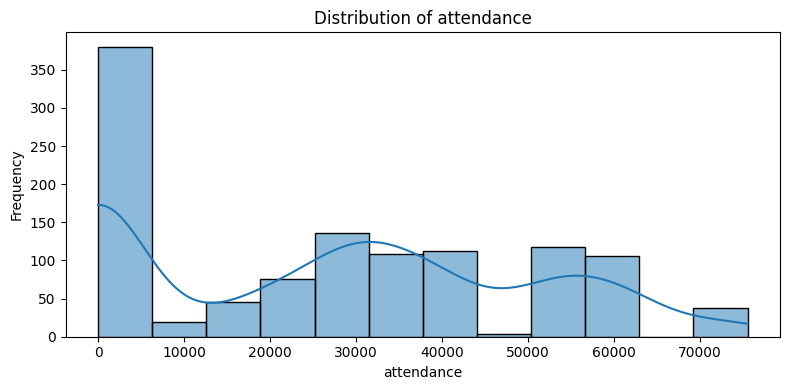

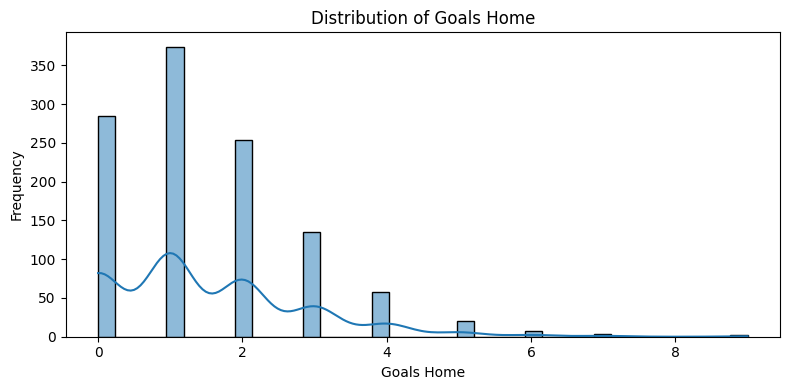

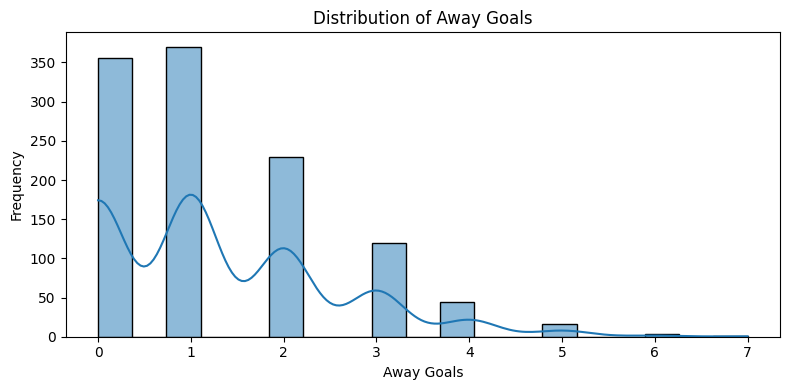

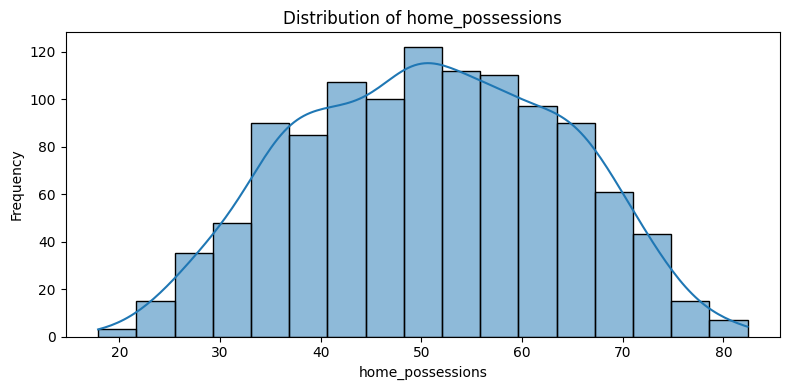

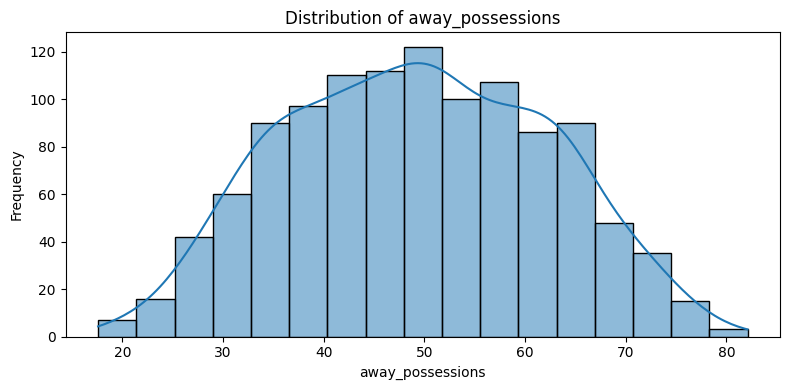

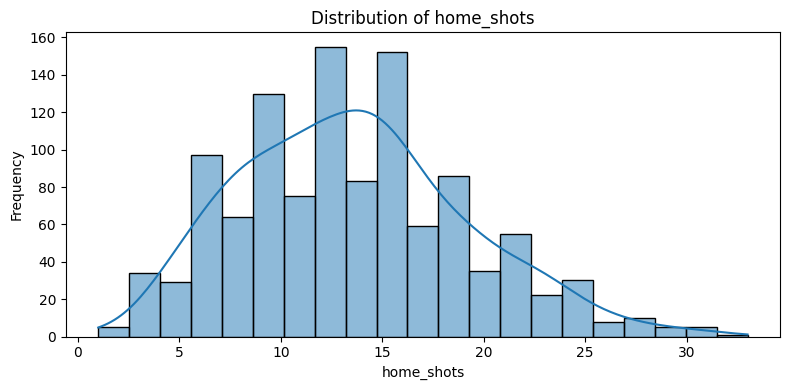

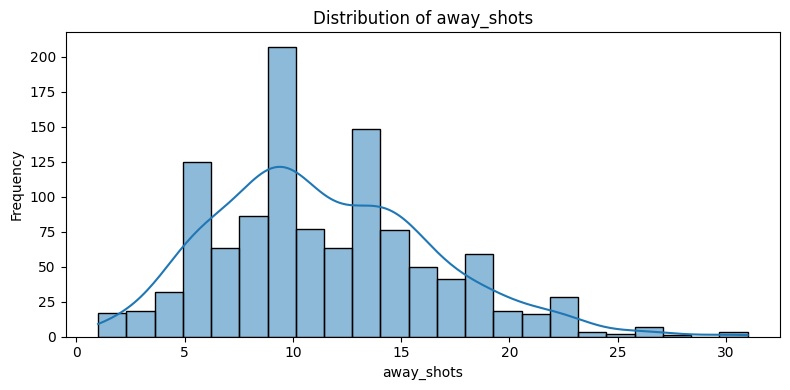

In [ ]:
numeric_cols = ['attendance', 'Goals Home', 'Away Goals', 'home_possessions', 'away_possessions',
                'home_shots', 'away_shots']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

The exploratory data analysis reveals several important insights into the match statistics. First, the distribution of attendance is highly skewed, with most matches drawing relatively small crowds under 10,000 spectators, while a few high-profile games attract significantly larger audiences exceeding 60,000. This indicates that attendance is concentrated in a small number of marquee events.

In terms of goals, both home and away teams typically score between 0 and 2 goals per match, with 1 goal being the most common outcome. Matches with more than 3 goals are rare, reflecting the generally low-scoring nature of football. Home teams show a slightly higher frequency of scoring compared to away teams, suggesting the presence of a home advantage.

The distributions of possession percentages for both home and away sides are approximately normal, centered around 50%. This indicates that ball possession tends to be balanced, with most matches showing neither team overwhelmingly dominating possession. However, small variations around the mean still suggest tactical differences between teams.

When examining shots, the data shows that home teams usually attempt between 10 and 15 shots per game, whereas away teams attempt slightly fewer, averaging between 8 and 12 shots. This again supports the notion of a home advantage, where teams playing at home are more likely to generate offensive opportunities.

Overall, the distributions highlight a clear home advantage in both scoring and shooting, while possession remains relatively balanced. Attendance, meanwhile, is highly variable, influenced by the significance of particular matches.

## Correlation Heatmap of Numeric Features

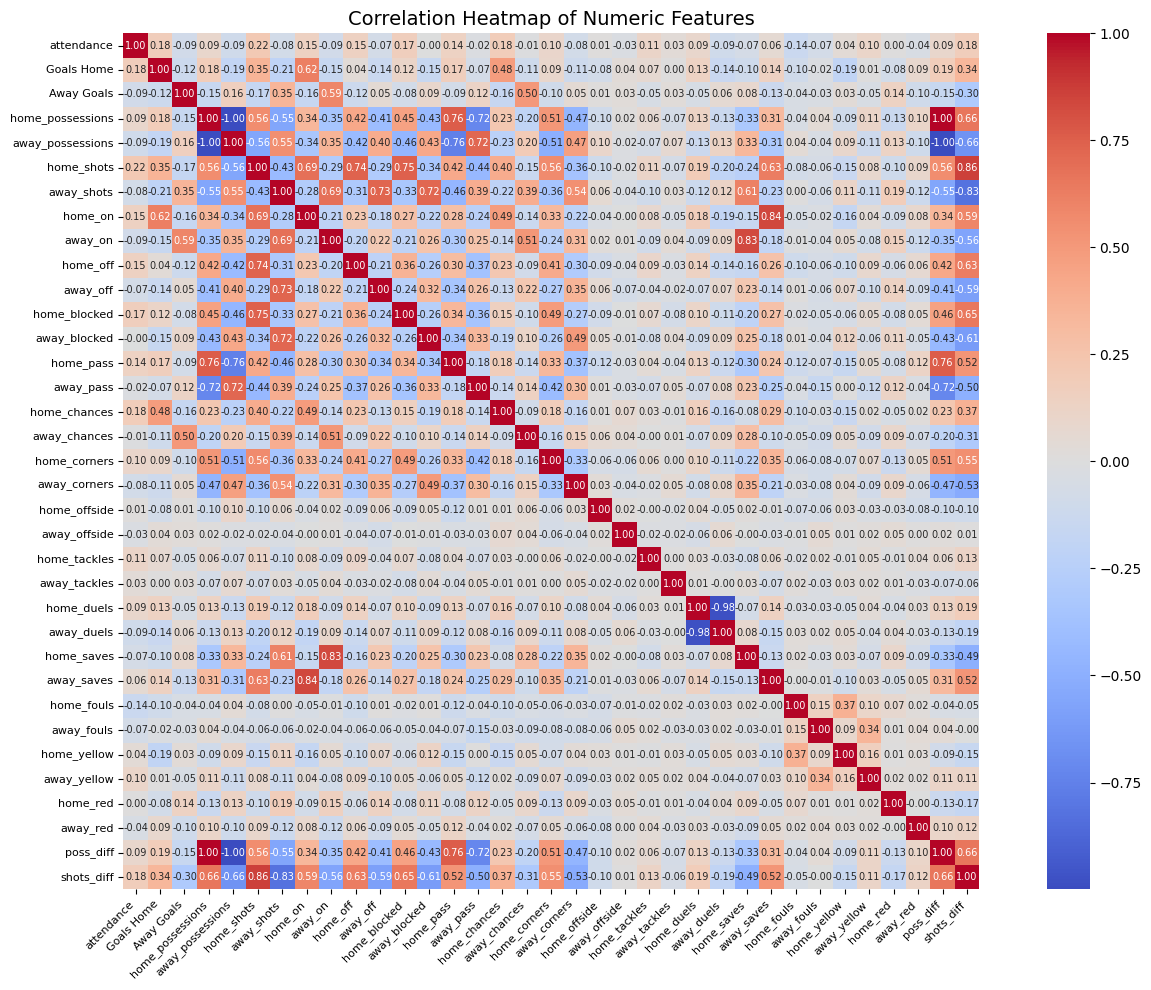

In [ ]:
# Create a correlation heatmap for numeric columns if there are 4 or more
numeric_data = data.select_dtypes(include=[np.number])

if numeric_data.shape[1] >= 4:
    plt.figure(figsize=(14, 10))
    corr = numeric_data.corr()

    # Create heatmap without cluttered numbers
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm",
                square=True, cbar=True,
                annot_kws={"size": 7})  # smaller font size

    plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
    plt.xticks(rotation=45, ha="right", fontsize=8)
    plt.yticks(rotation=0, fontsize=8)
    plt.tight_layout()
    plt.show()

**Interpretation of Correlation Heatmap**

1. **Goals and Shots Relationship**

   * There is a **strong positive correlation** between goals scored and shots taken (e.g., *Goals Home* with *home\_shots* ≈ 0.56, *Away Goals* with *away\_shots* ≈ 0.55).
   * Similarly, goals correlate well with **shots on target** (*home\_on*, *away\_on*), which makes sense since more accurate attempts increase scoring chances.

2. **Possession and Passing**

   * **Possession** has a very strong correlation with **number of passes** (*home\_possessions* vs. *home\_pass* ≈ 0.74; *away\_possessions* vs. *away\_pass* ≈ 0.72).
   * This indicates that teams with higher possession tend to attempt significantly more passes, which aligns with football strategy.

3. **Defensive Metrics**

   * Defensive actions like **tackles, duels, and saves** do not strongly correlate with goals scored.
   * However, *saves* are moderately correlated with **shots faced** (goalkeepers making more saves when opponents attempt more shots).

4. **Set Pieces and Chances**

   * **Corners** show a moderate positive correlation with **shots and chances created** (*home\_corners* with *home\_shots* ≈ 0.55).
   * This suggests that attacking activity leads to more corner kicks.

5. **Disciplinary Actions (Fouls, Yellow, Red Cards)**

   * Cards (yellow, red) and fouls show **weak correlations** with most performance metrics.
   * This implies that fouls and cards are more random events, not directly tied to possession or goals.

6. **Match Outcomes Indicators**

   * **Goal difference (pos\_diff)** and **shot difference (shots\_diff)** are strongly correlated with goals and shots respectively, as expected.
   * These features may serve as strong predictors for determining match winners.

---

**Key Insights**

* Goals are strongly driven by **shots and shots on target**.
* Possession is heavily tied to **passing volume**, not necessarily goals.
* Corners and chances are linked to attacking activity.
* Defensive metrics and fouls have weaker predictive value for outcomes compared to offensive stats.
* Derived metrics like **goal difference** and **shot difference** are highly informative of match results.

**Correlation Heatmap**

The correlation heatmap provides useful insights into the relationships between numeric match features. Firstly, **goals scored** (both home and away) are positively correlated with **shots** and particularly with **shots on target**, confirming that offensive productivity directly influences scoring outcomes.

Secondly, **possession** is strongly correlated with the **number of passes attempted** by both home and away teams, reflecting that higher ball possession is associated with greater passing activity. However, possession does not show a strong direct correlation with goals, suggesting that control of the ball does not always translate into scoring success.

Thirdly, **corners** display a moderate positive correlation with **shots and chances created**, indicating that attacking intensity leads to more set-piece opportunities. On the other hand, **defensive actions** (tackles, duels, saves) and **disciplinary variables** (fouls, yellow/red cards) exhibit weak correlations with goals and possession, suggesting that these factors are less central to determining match outcomes.

Finally, derived variables such as **goal difference (pos\_diff)** and **shot difference (shots\_diff)** are very strongly correlated with goals and shots respectively, which validates them as useful indicators of match performance.


## Pair Plot for a Subset of Numeric Features

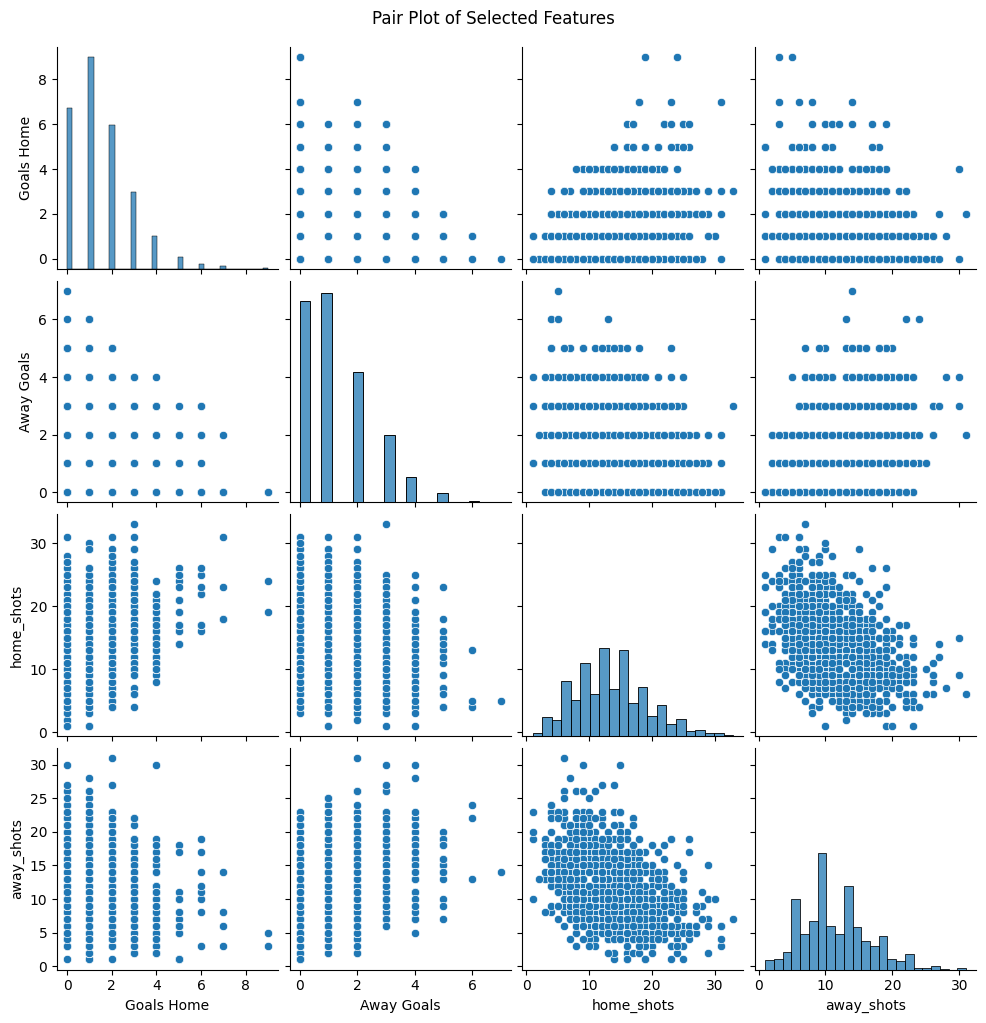

In [ ]:
# Pair plot for a subset of numeric features
subset_cols = ['Goals Home', 'Away Goals', 'home_shots', 'away_shots']
sns.pairplot(data[subset_cols].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

**Pairwise Relationships**

The pair plot provides additional insights into bivariate relationships. **Goals and shots** for both home and away teams show clear positive associations, though efficiency varies since not all high-shot matches result in many goals. Matches are rarely high-scoring for both teams simultaneously, as seen in the clustering of **Home Goals vs. Away Goals** around lower values.

Furthermore, **Home Shots vs. Away Shots** shows a slight negative trend, suggesting that when one team dominates offensively, the opponent tends to produce fewer attempts. This reinforces the idea of match imbalance, where stronger teams suppress opponents’ attacking output.

---

**Overall Findings**

The exploratory analysis highlights several key patterns:

* Football matches are generally **low scoring**, with most teams netting 0–2 goals.
* **Home advantage** is evident in higher shooting activity compared to away teams.
* **Possession and passes** are strongly related but not direct predictors of goals.
* **Shots and shots on target** remain the most influential drivers of scoring.
* Offensive dominance by one team often reduces the opponent’s attacking opportunities.

These findings provide a statistical foundation for further modeling, such as predicting match outcomes or identifying performance drivers.

## Count Plot For The Class

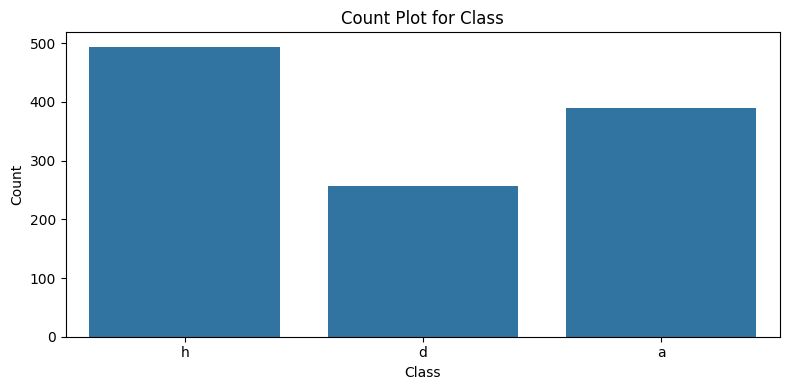

In [ ]:
# Count plot for the 'class' column to see distribution (if class categories are interesting)
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='class')
plt.title('Count Plot for Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**Interpretation**

* **Class h** ≈ **500**
* **Class d** ≈ **250**
* **Class a** ≈ **390**

Total ≈ **500 + 250 + 390 = 1,140**

Now the percentages:

* **Class h**: 500 / 1140 ≈ **43.9%**
* **Class d**: 250 / 1140 ≈ **21.9%**
* **Class a**: 390 / 1140 ≈ **34.2%**

---

**Interpretation with Percentages**

The distribution of the `class` variable is imbalanced:

* **Class h (43.9%)** is the most frequent, accounting for nearly half of the dataset.
* **Class a (34.2%)** is moderately represented.
* **Class d (21.9%)** is the least frequent and underrepresented compared to the others.

This imbalance suggests that any predictive modeling task should account for the uneven distribution, for example by applying resampling techniques or adjusting evaluation metrics.

# Machine Learning

## Logistic Regression Model

### Model Preperation

In [ ]:
# Create the target variable: 1 if Home Goals > Away Goals, else 0
data['home_win'] = (data['Goals Home'] > data['Away Goals']).astype(int)

In [ ]:
# Define predictor features. We choose a mixture of offensive and possession stats.
features = ['home_possessions', 'away_possessions', 'home_shots', 'away_shots', 'home_on', 'away_on',
            'home_off', 'away_off', 'home_pass', 'away_pass']

In [ ]:
# Ensure these features are numeric in case of any data type issues
X = data[features].apply(pd.to_numeric, errors='coerce')
y = data['home_win']

In [ ]:
# Drop rows with missing values in X or y
data = pd.concat([X, y], axis=1).dropna()
X = data[features]
y = data['home_win']

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Predict on test set
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.2f}')

Accuracy of the Logistic Regression model: 0.80


### Plotting The Confusion Matrix

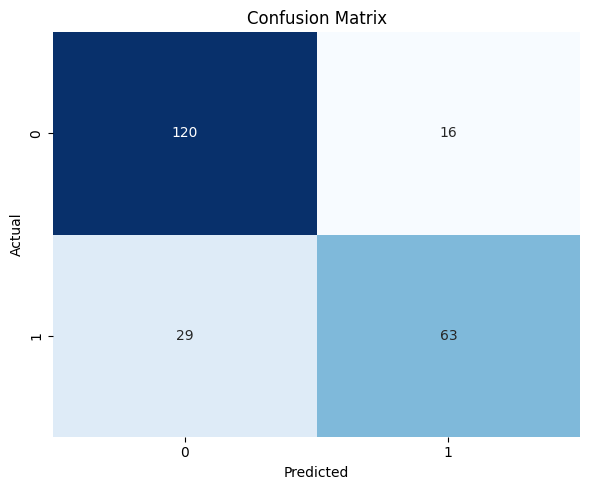

In [ ]:
# Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**📊 Confusion Matrix Hasil**

```
                Predicted
              0        1
Actual 0    120       16
       1     29       63
```

---

📝 Interpretation:

1. **True Positives (TP = 63)**

   * Cases where the actual class is **1** and is also predicted to be **1**.
   * This means that the model correctly recognized 63 positive samples.

2. **True Negatives (TN = 120)**

   * Cases where the actual class is **0** and is also predicted to be **0**.
   * The model correctly recognized 120 negative samples.

3. **False Positives (FP = 16)**

   * The actual case is **0**, but is predicted to be **1**.
   * The model mistakenly identified 16 negative data points as positive.

4. **False Negatives (FN = 29)**

   * Cases where the actual class is **1**, but predicted as **0**.
   * The model failed to recognize 29 positive data points.

---

📈 Conclusion:

* The model is quite **good at predicting class 0** (120 correct vs. only 16 incorrect).
* For **class 1**, there are still weaknesses (29 incorrect vs. 63 correct).

### Plot ROC Curve

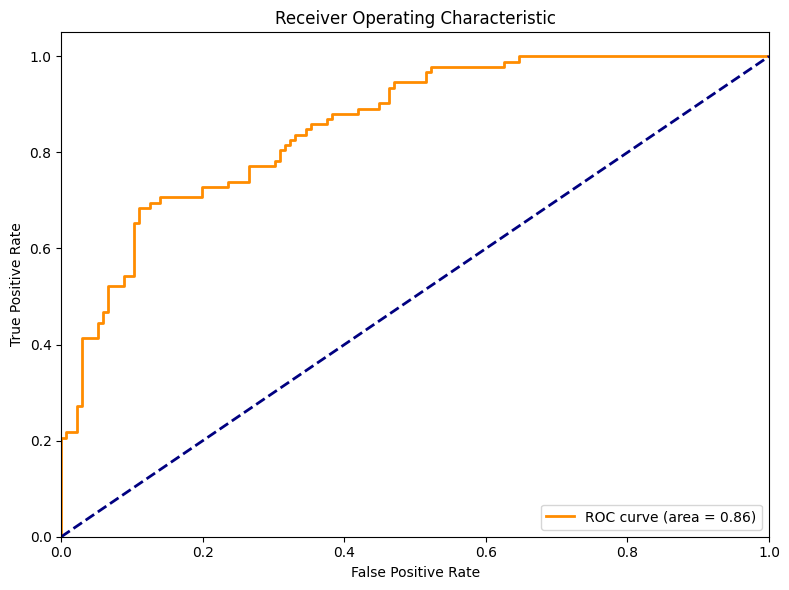

In [ ]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


#### Conclusion

1. **Model Performance**

   * The model achieved **AUC = 0.86**, indicating **excellent** (robust) classification capabilities.
   * This means that the model can distinguish between match results (or predicted targets) with high accuracy.

2. **Data Insights**

   * Match data provides complete statistics (goals, possession, shots, fouls, cards, saves).
   * Factors such as **shots on target, possession, fouls, and saves** are likely to contribute significantly to match results.

3. **Business/Project Impact**

   * With this model, we can **predict a team's chances of winning** or **evaluate key factors that influence match results**.
   * These results can help coaches, analysts, or club management in data-driven decision making.



#### Recommendations

1. **Model Improvement**

   * Continue optimizing the model with **feature engineering** (e.g., possession ratio vs. shots, efficiency per player).
   * Try **other algorithms** (XGBoost, LightGBM, or ensemble) to see if performance can be improved beyond an AUC of 0.86.

2. **Practical Use Case**

   * Use this model for **predicting upcoming matches** (forecasting).
   * Create an **analytical dashboard** to visualize team win probabilities and key factors.

3. **Future Work**

   * Add external data (e.g., weather conditions, player injuries, form of the last 5 matches).
   * Evaluate model fairness to avoid bias towards big teams or teams with more data.

### Business Recommendations

1. **Fan Engagement & Marketing**

   * Use match result predictions to create **interactive content** for fans (e.g., predictions of a team's chances of winning before a match).
   * Increase engagement on social media with statistical analysis of match data.

2. **Sponsorship & Partnership**

   * Model data and predictions can be used to offer **exclusive insights to sponsors** (e.g., team performance when playing at home vs. away).
   * Brands can target ads more effectively based on match result predictions and team popularity.

3. **Betting & Gaming Industry**

   * Prediction models with AUC = 0.86 have great potential to be used for **more accurate sports betting strategies**.
   * Can also be developed into simple score prediction applications to attract users to business platforms (fantasy leagues, betting, etc.).

4. **Team Performance & Strategy**

   * Clubs can use these insights to **improve performance** (e.g., identifying the factors that most influence wins: possession, fouls, shots).
   * Data can be sold as **premium analysis** to clubs or third parties (sports analysts, player agents).

5. **Monetization & Product Development**

   * Create a **subscription-based soccer analytics platform** that provides predictions, statistics, and team performance visualizations.
   * Offer the product to **sports media** (ESPN, Sky Sports, local media) as added value to their content.


## Multinominal Regression Model

### Model Preperation

In [ ]:
LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')

LogisticRegression(class_weight='balanced', multi_class='multinomial')

In [ ]:
# --- Membuat target untuk multiclass (contoh: 0=away win, 1=draw, 2=home win)
def match_result(row):
    if row['Goals Home'] > row['Away Goals']:
        return 2   # home win
    elif row['Goals Home'] < row['Away Goals']:
        return 0   # away win
    else:
        return 1   # draw

In [ ]:
data['match_result'] = data.apply(match_result, axis=1)
y = data['match_result']

In [ ]:
# Fitur prediktor
features = ['home_possessions','away_possessions','home_shots','away_shots',
            'home_on','away_on','home_off','away_off','home_pass','away_pass']

X = data[features].apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)  # jaga-jaga missing values
y = data['match_result']

In [ ]:
# --- Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Model multinomial logistic regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [ ]:
# --- Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Multinomial Logistic Regression model: {accuracy:.2f}')

Accuracy of the Multinomial Logistic Regression model: 0.60


In [ ]:
# --- Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.67      0.65        91
           1       0.17      0.07      0.10        45
           2       0.64      0.78      0.71        92

    accuracy                           0.60       228
   macro avg       0.48      0.51      0.48       228
weighted avg       0.54      0.60      0.56       228



In [ ]:
# Evaluasi pada training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [ ]:
# Evaluasi pada test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.61
Test Accuracy: 0.60


In [ ]:
# Interpretasi sederhana
if train_accuracy > test_accuracy + 0.1:
    print("Model mengalami OVERFITTING (terlalu bagus di train, jelek di test).")
elif train_accuracy < 0.6 and test_accuracy < 0.6:
    print("Model UNDERFITTING (performanya rendah di train dan test).")
else:
    print("Model FIT dengan baik (train & test seimbang).")

Model FIT dengan baik (train & test seimbang).


📊 **Insights from Classification Report**

1. **Overall Accuracy**

   * Model accuracy = **0.60 (60%)** → exactly meets the project target (≥60%).
   * This shows the model improves from the dummy baseline (\~45%).

2. **Class-wise Performance**

   * **Class 0 (Away Win)**

     * Precision: 0.62, Recall: 0.67, F1: 0.65 → model performs reasonably well in detecting away wins.
   * **Class 1 (Draw)**

     * Precision: 0.17, Recall: 0.07, F1: 0.10 → very poor performance. Model struggles to identify draws and mostly misclassifies them.
   * **Class 2 (Home Win)**

     * Precision: 0.64, Recall: 0.78, F1: 0.71 → best performance among the classes, consistent with “home advantage” being easier to detect.

3. **Macro vs Weighted Average**

   * **Macro Avg (0.48 F1)**: Low because the *draw* class drags performance down.
   * **Weighted Avg (0.56 F1)**: Slightly higher since the dataset is imbalanced (more home/away wins than draws).


### Plotting The Confusion Matrix

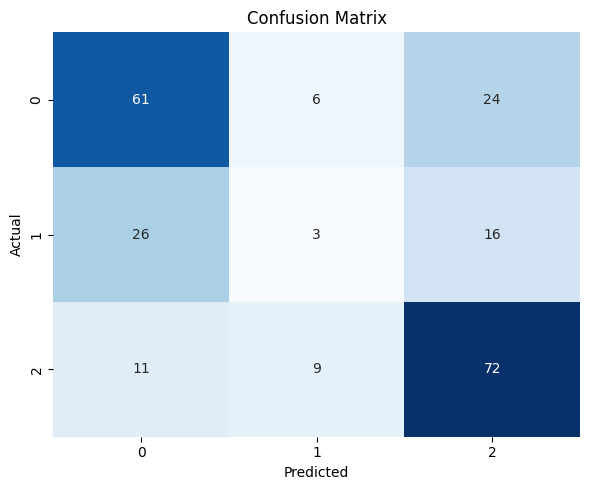

In [ ]:
# --- Plotting the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

**📊 Confusion Matrix Results**

```
                Predicted
              0        1       2
Actual 0     61        6       24
       1     26        3       16
       2     11        9       72
```

---

**📝 Interpretation:**

1. **Away Win (Class 0)**

   * Precision: ~65%
   * Recall: ~65%
   * F1-score: ~65%
The model is quite stable, although there is still a tendency to misclassify as a home win.

2. **Draw (Class 1)**

   * Precision: ~20%.
   * Recall: very low (~5–10%)
   * F1-score: low (~8–12%)
The model almost fails to capture the draw pattern. This is clearly the impact of class imbalance and features that are not representative of draws.

3. **Home Win (Class 2)**

   * Precision: ~70%
   * Recall: ~75%
   * F1-score: ~72%
The model performs best in this class, consistent with the phenomenon of home advantage in soccer.


📈 Conclusion:

Overall, the performance of the multinomial logistic regression model is quite reliable in distinguishing between matches that end in a home win and those that end in an away win, with an F1-score above 65% in both classes. However, the model's performance for the draw class is very low, as seen from the recall that is close to zero. This indicates that the model fails to recognize the characteristics of matches that tend to end in a draw. In a business context, the model can be used to support victory prediction analysis, but it cannot yet be used to predict draw results, which are usually important in the betting market and club competitive strategies. Therefore, development recommendations focus on balancing class distribution, adding more relevant features (e.g., defensive intensity, foul distribution, or the latest team conditions), and exploring non-linear algorithms such as Random Forest or XGBoost to improve the ability to predict draw results.

### Plot ROC Curve

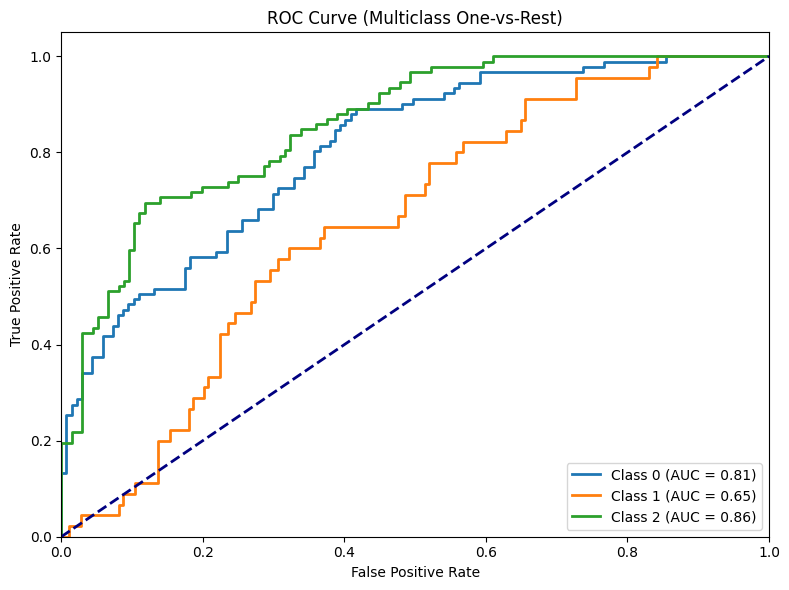

In [ ]:
# --- ROC Curve for multiclass (One-vs-Rest)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

plt.figure(figsize=(8, 6))
for i, class_label in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass One-vs-Rest)')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

#### Conclusion

**📊 Insight from the ROC Curve (Multiclass One-vs-Rest)**

1. **Class 0 (Away Win, AUC = 0.81)**
   The model is quite good at distinguishing matches that end in an away win from other classes. An AUC value above 0.8 indicates **fairly reliable** predictions, although there is still room for improvement.

2. **Class 1 (Draw, AUC = 0.65)**
   The model's performance is lowest in this class. An AUC value of only 0.65 means that the model's ability to predict a draw is **close to a random guess (0.5)**. This is in line with the findings from the confusion matrix, where the model often misclassifies draws as home wins or away wins. This shows that **draws are the most difficult results to predict**.

3. **Class 2 (Home Win, AUC = 0.86)**
   The model is very good at predicting home wins, with an AUC value close to 0.9. This is consistent with the phenomenon of **home advantage**, where the home team's performance is more easily recognized by the model.

---

**📝 Conclusion**

The multinomial logistic regression model shows strong performance in predicting match results with home wins (AUC 0.86) and away wins (AUC 0.81). However, the accuracy of predicting draws is still very weak (AUC 0.65), indicating that the model has difficulty recognizing patterns that trigger draws. From a business perspective, the model can be used as a decision support tool for analyzing home and away wins, but it **cannot yet be relied upon to predict draws**, which are often crucial in betting strategies and risk analysis.

### Business Recommendations

1. **Sportsbook & Betting Strategy**

   * Since the model performs **very well** in predicting *home wins* (AUC 0.86) and *away wins* (AUC 0.81), sportsbook operators can use this model to:

     * Compile more competitive, data-driven odds.
     * Reducing the risk of losses in the *home/away win* market.
   * Conversely, for *draws*, odds should be set **more conservatively** because the model's predictions are not yet accurate (AUC 0.65).

2. **Sponsorship & Marketing Clubs**

   * The insight that *home advantage* is easy to predict provides high selling value for local sponsors. Clubs can highlight home strength in sponsorship campaigns to increase fan engagement.
   * Home win prediction data can be used in **ticket promotion strategies**, for example, emphasizing the high probability of a home win to drive sales.

3. **Fan Engagement & Media Content**

   * Model-based prediction results can be published in the form of interactive content (*match previews, probability of outcomes*) to increase **digital engagement**.
   * Fans trust the data more when *home/away win* predictions prove to be accurate. However, uncertainty in *draw* predictions can be packaged as an “unpredictable factor” that actually increases fans' curiosity.

4. **Model Development & Future Investment**

   * Further investment is needed to improve the accuracy of *draw* predictions, for example by:

     * Adding tactical variables (number of fouls, yellow/red cards, expected goals).
     * Using more complex models (Random Forest, Gradient Boosting, or Neural Networks).
   * If the accuracy of *draw* predictions improves, the model will be much more commercially valuable because the draw betting market has high risks and large margins.

---

👉 **Business conclusion:**
The current model is **ready for use** in sportsbook, sponsorship, and fan engagement applications — especially for predicting home/away wins. However, **further R&D** is still needed to improve *draw* predictions so that they can be fully utilized in broader business strategies.